In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('student_por.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.rename(columns = {'schoolsup':'school_support', 'famsup':'family_support', 'paid' :'extra_paid_classes',
                     'higher':'higher_edu_willing', 'famrel':'family_relationships', 'Dalc':'weekday_alcohol_cons',
                     'Walc':'Weekend_alcohol_cons', 'G1':'grade1','G2':'grade2','G3':'final' }, inplace = True) 
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'extra_paid_classes',
       'activities', 'nursery', 'higher_edu_willing', 'internet', 'romantic',
       'family_relationships', 'freetime', 'goout', 'weekday_alcohol_cons',
       'Weekend_alcohol_cons', 'health', 'absences', 'grade1', 'grade2',
       'final'],
      dtype='object')

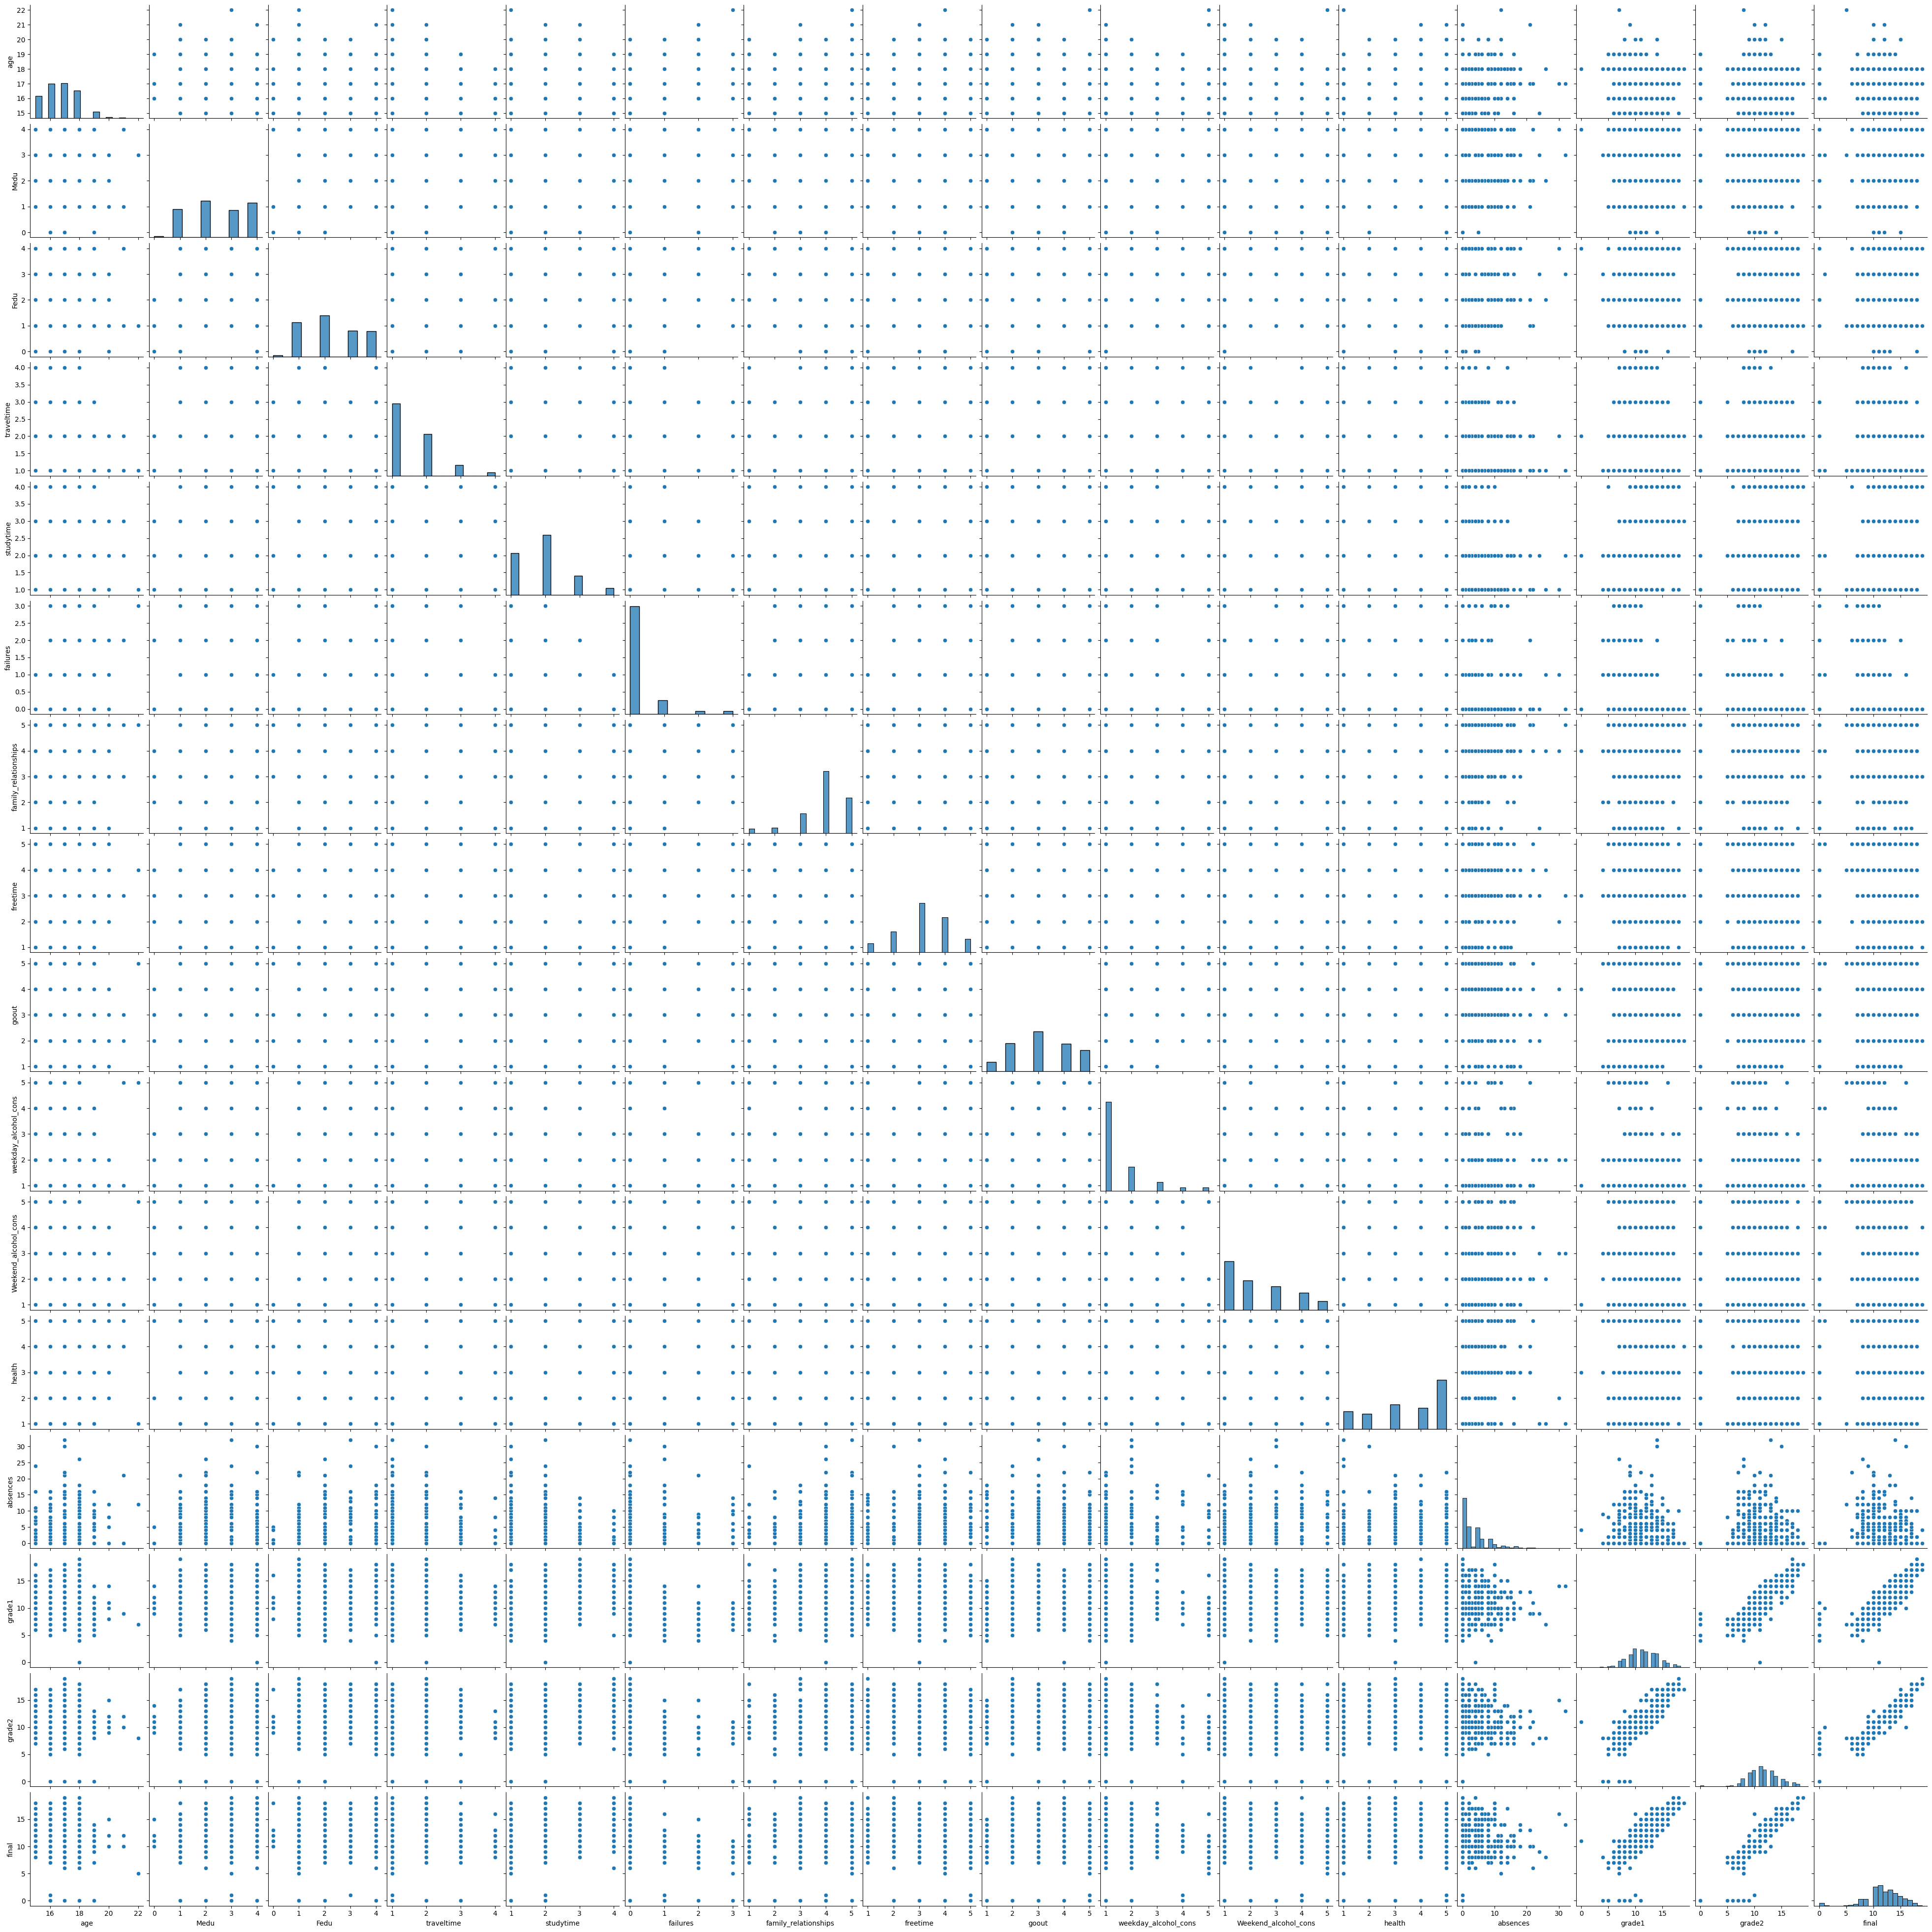

In [8]:
sns.pairplot(df);

In [9]:
df.school.value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

In [10]:
school_name = pd.get_dummies(df['school'], drop_first=True, dtype=int)
df = df.join(school_name)
df = df.drop('school', axis=1)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,weekday_alcohol_cons,Weekend_alcohol_cons,health,absences,grade1,grade2,final,MS
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,4,0,11,11,0
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,2,9,11,11,0
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,6,12,13,12,0
3,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,0,14,14,14,0
4,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,0,11,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,4,2,1,2,5,4,10,11,10,1
645,F,18,U,LE3,T,3,1,teacher,services,course,...,3,4,1,1,1,4,15,15,16,1
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,5,6,11,12,9,1
647,M,17,U,LE3,T,3,1,services,services,course,...,4,5,3,4,2,6,10,10,10,1


In [11]:
df.sex.value_counts()

sex
F    383
M    266
Name: count, dtype: int64

In [12]:
df.loc[ df['sex'] == "F", 'sex'] = "Female"
df.loc[ df['sex'] == "M", 'sex'] = "Male"

In [13]:
df.groupby(['sex'])['final'].mean()

sex
Female    12.253264
Male      11.406015
Name: final, dtype: float64

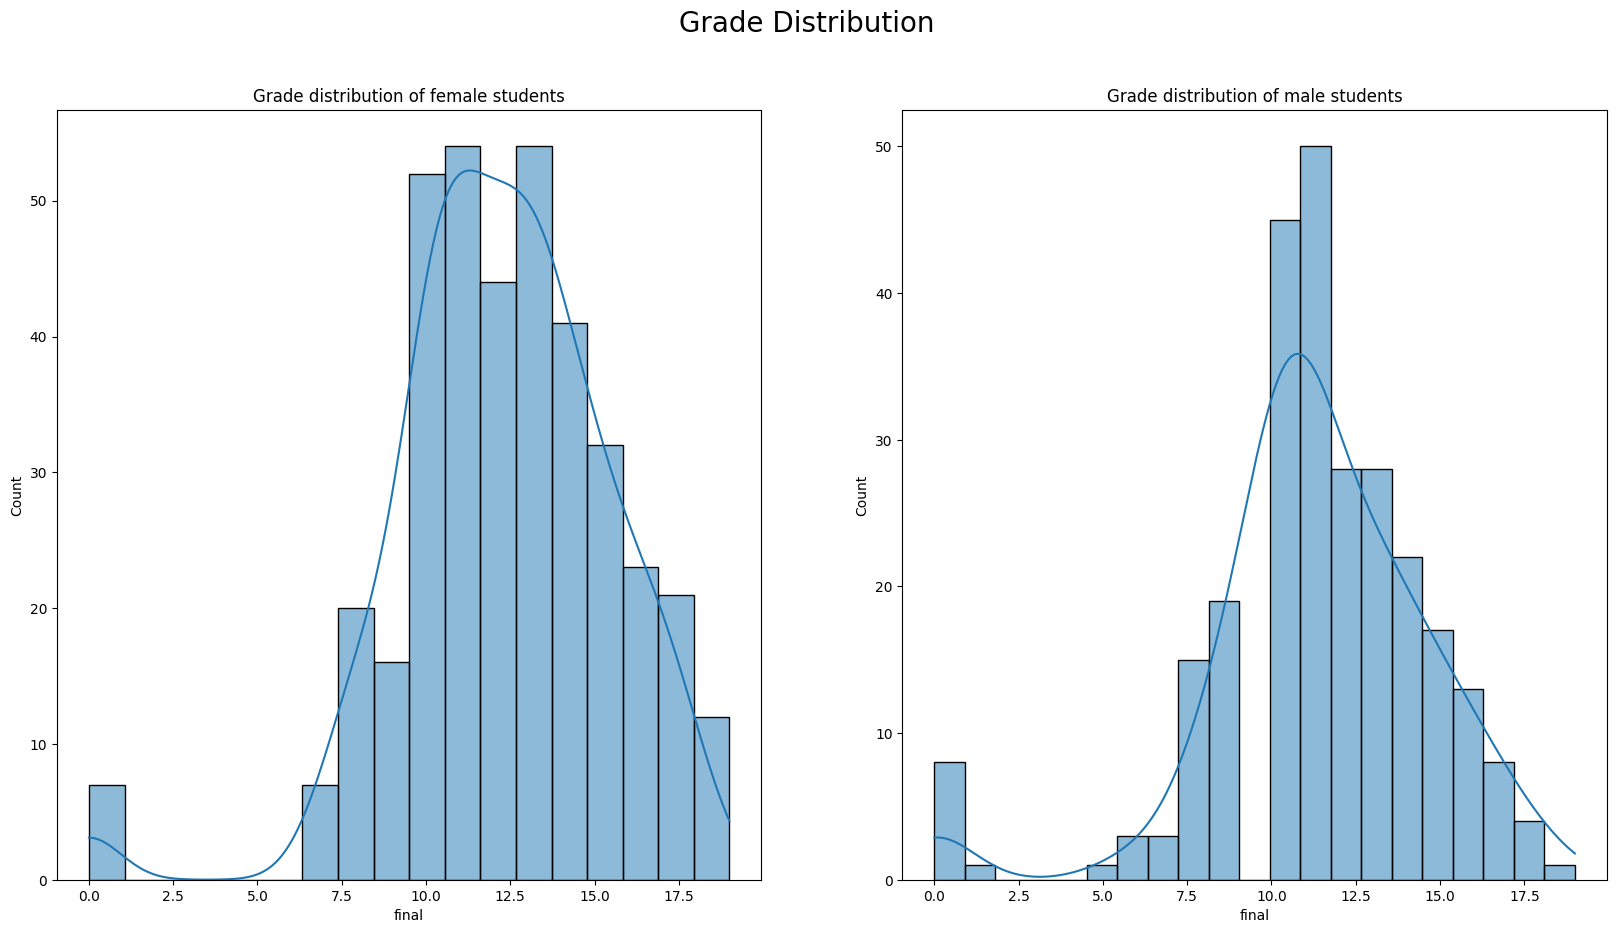

In [14]:
plt.figure(figsize=[20,10])

plt.suptitle('Grade Distribution', fontsize = 20)


plt.subplot(1,2,1)
sns.histplot(data = df.loc[df['sex']=="Female", 'final'], kde=True)
plt.title('Grade distribution of female students');

plt.subplot(1,2,2)
sns.histplot(data = df.loc[df['sex']=="Male", 'final'], kde=True)
plt.title('Grade distribution of male students');
plt.savefig("finalgender.png")

In [15]:
gender = pd.get_dummies(df['sex'], drop_first=True, dtype=int)
df = df.join(gender)
df = df.drop('sex', axis=1)
df

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,goout,weekday_alcohol_cons,Weekend_alcohol_cons,health,absences,grade1,grade2,final,MS,Male
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,1,1,3,4,0,11,11,0,0
1,17,U,GT3,T,1,1,at_home,other,course,father,...,3,1,1,3,2,9,11,11,0,0
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,2,2,3,3,6,12,13,12,0,0
3,15,U,GT3,T,4,2,health,services,home,mother,...,2,1,1,5,0,14,14,14,0,0
4,16,U,GT3,T,3,3,other,other,home,father,...,2,1,2,5,0,11,13,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,R,GT3,T,2,3,services,other,course,mother,...,2,1,2,5,4,10,11,10,1,0
645,18,U,LE3,T,3,1,teacher,services,course,mother,...,4,1,1,1,4,15,15,16,1,0
646,18,U,GT3,T,1,1,other,other,course,mother,...,1,1,1,5,6,11,12,9,1,0
647,17,U,LE3,T,3,1,services,services,course,mother,...,5,3,4,2,6,10,10,10,1,1


In [16]:
df.age.value_counts()

age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

In [17]:
age_grades = df.groupby(['age'])['final'].mean()

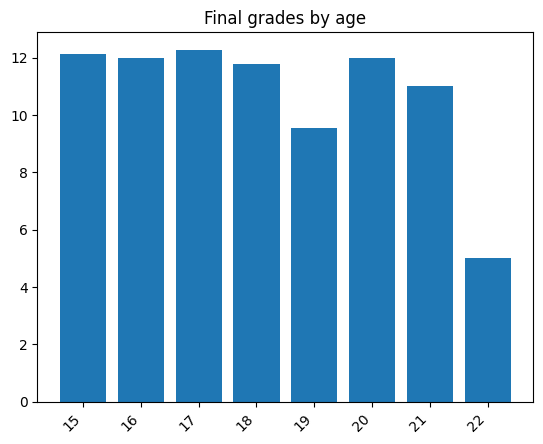

In [18]:
plt.bar(age_grades.index, age_grades);
plt.xticks(rotation=45, ha='right');
plt.title("Final grades by age");
plt.savefig("agefinal.png")

In [19]:
df.address.value_counts()

address
U    452
R    197
Name: count, dtype: int64

In [20]:
df.loc[ df['address'] == "U", 'address'] = "urban"
df.loc[ df['address'] == "R", 'address'] = "rural"

In [21]:
df.groupby(['address'])['final'].mean()

address
rural    11.086294
urban    12.263274
Name: final, dtype: float64

In [22]:
Address = pd.get_dummies(df['address'], drop_first=True, dtype=int)
df = df.join(Address)
df = df.drop('address', axis=1)
df

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,weekday_alcohol_cons,Weekend_alcohol_cons,health,absences,grade1,grade2,final,MS,Male,urban
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,1,1,3,4,0,11,11,0,0,1
1,17,GT3,T,1,1,at_home,other,course,father,1,...,1,1,3,2,9,11,11,0,0,1
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,2,3,3,6,12,13,12,0,0,1
3,15,GT3,T,4,2,health,services,home,mother,1,...,1,1,5,0,14,14,14,0,0,1
4,16,GT3,T,3,3,other,other,home,father,1,...,1,2,5,0,11,13,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,GT3,T,2,3,services,other,course,mother,1,...,1,2,5,4,10,11,10,1,0,0
645,18,LE3,T,3,1,teacher,services,course,mother,1,...,1,1,1,4,15,15,16,1,0,1
646,18,GT3,T,1,1,other,other,course,mother,2,...,1,1,5,6,11,12,9,1,0,1
647,17,LE3,T,3,1,services,services,course,mother,2,...,3,4,2,6,10,10,10,1,1,1


In [23]:
df.famsize.value_counts()

famsize
GT3    457
LE3    192
Name: count, dtype: int64

In [24]:
df.groupby(['famsize'])['final'].mean()

famsize
GT3    11.811816
LE3    12.130208
Name: final, dtype: float64

In [25]:
family_size = pd.get_dummies(df['famsize'], drop_first=True, dtype=int)
df = df.join(family_size)
df = df.drop('famsize', axis=1)
df

,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,Weekend_alcohol_cons,health,absences,grade1,grade2,final,MS,Male,urban,LE3
0,18,A,4,4,at_home,teacher,course,mother,2,2,...,1,3,4,0,11,11,0,0,1,0
1,17,T,1,1,at_home,other,course,father,1,2,...,1,3,2,9,11,11,0,0,1,0
2,15,T,1,1,at_home,other,other,mother,1,2,...,3,3,6,12,13,12,0,0,1,1
3,15,T,4,2,health,services,home,mother,1,3,...,1,5,0,14,14,14,0,0,1,0
4,16,T,3,3,other,other,home,father,1,2,...,2,5,0,11,13,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,T,2,3,services,other,course,mother,1,3,...,2,5,4,10,11,10,1,0,0,0
645,18,T,3,1,teacher,services,course,mother,1,2,...,1,1,4,15,15,16,1,0,1,1
646,18,T,1,1,other,other,course,mother,2,2,...,1,5,6,11,12,9,1,0,1,0
647,17,T,3,1,services,services,course,mother,2,1,...,4,2,6,10,10,10,1,1,1,1


In [26]:
df.Pstatus.value_counts()

Pstatus
T    569
A     80
Name: count, dtype: int64

In [27]:
df.loc[ df['Pstatus'] == "T", 'Pstatus'] = "parents_together"
df.loc[ df['Pstatus'] == "A", 'Pstatus'] = "parents_apart"

In [28]:
df.groupby(['Pstatus'])['final'].mean()

Pstatus
parents_apart       11.912500
parents_together    11.905097
Name: final, dtype: float64

In [29]:
parents_stat = pd.get_dummies(df['Pstatus'], drop_first=True, dtype=int)
df = df.join(parents_stat)
df = df.drop('Pstatus', axis=1)
df

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,health,absences,grade1,grade2,final,MS,Male,urban,LE3,parents_together
0,18,4,4,at_home,teacher,course,mother,2,2,0,...,3,4,0,11,11,0,0,1,0,0
1,17,1,1,at_home,other,course,father,1,2,0,...,3,2,9,11,11,0,0,1,0,1
2,15,1,1,at_home,other,other,mother,1,2,0,...,3,6,12,13,12,0,0,1,1,1
3,15,4,2,health,services,home,mother,1,3,0,...,5,0,14,14,14,0,0,1,0,1
4,16,3,3,other,other,home,father,1,2,0,...,5,0,11,13,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,services,other,course,mother,1,3,1,...,5,4,10,11,10,1,0,0,0,1
645,18,3,1,teacher,services,course,mother,1,2,0,...,1,4,15,15,16,1,0,1,1,1
646,18,1,1,other,other,course,mother,2,2,0,...,5,6,11,12,9,1,0,1,0,1
647,17,3,1,services,services,course,mother,2,1,0,...,2,6,10,10,10,1,1,1,1,1


In [30]:
df.Medu.value_counts()

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

In [31]:
df.groupby(['Medu'])['final'].mean()

Medu
0    11.666667
1    10.797203
2    11.661290
3    11.920863
4    13.068571
Name: final, dtype: float64

In [32]:
df.Fedu.value_counts()

Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

In [33]:
df.groupby(['Fedu'])['final'].mean()

Fedu
0    12.142857
1    10.936782
2    11.784689
3    12.381679
4    12.921875
Name: final, dtype: float64

In [34]:
best50 = df.sort_values('final', ascending=False).head(50)

In [35]:
best50.loc[ best50['Medu'] == 0, 'Medu'] = "none"
best50.loc[ best50['Medu'] == 1, 'Medu'] = "primary education"
best50.loc[ best50['Medu'] == 2, 'Medu'] = "lower secondary education"
best50.loc[ best50['Medu'] == 3, 'Medu'] = "secondary education"
best50.loc[ best50['Medu'] == 4, 'Medu'] = "higher education"

best50.loc[ best50['Fedu'] == 0, 'Fedu'] = "none"
best50.loc[ best50['Fedu'] == 1, 'Fedu'] = "primary education"
best50.loc[ best50['Fedu'] == 2, 'Fedu'] = "lower secondary education"
best50.loc[ best50['Fedu'] == 3, 'Fedu'] = "secondary education"
best50.loc[ best50['Fedu'] == 4, 'Fedu'] = "higher education"

C:\Users\Ahoya\AppData\Local\Temp\ipykernel_15920\1620532052.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'none' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  best50.loc[ best50['Medu'] == 0, 'Medu'] = "none"
C:\Users\Ahoya\AppData\Local\Temp\ipykernel_15920\1620532052.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'none' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  best50.loc[ best50['Fedu'] == 0, 'Fedu'] = "none"


In [36]:
best50medu = pd.DataFrame(best50.Medu.value_counts())
best50medu

,count
Medu,
higher education,25
secondary education,12
lower secondary education,8
primary education,5


In [37]:
best50fedu = pd.DataFrame(best50.Fedu.value_counts())
best50fedu

,count
Fedu,
lower secondary education,19
higher education,14
secondary education,10
primary education,6
none,1


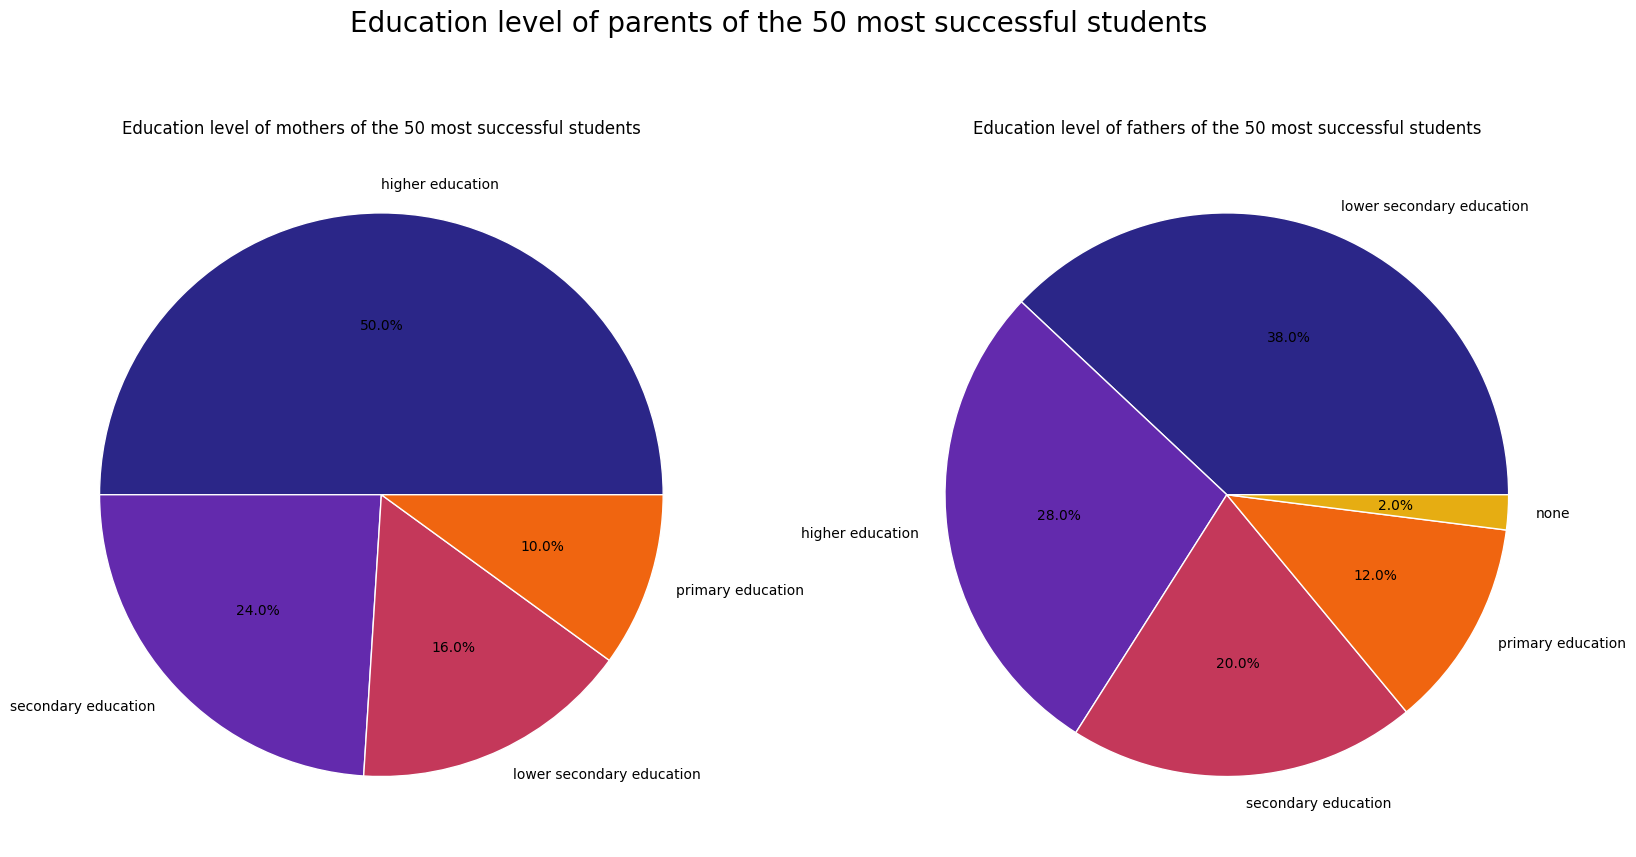

In [38]:
plt.figure(figsize=[20,10])

plt.suptitle('Education level of parents of the 50 most successful students', fontsize = 20)
#colors = sns.color_palette(palette='gnuplot')
colors = sns.color_palette(palette='CMRmap')
plt.subplot(1,2,1)
plt.pie(best50medu['count'], labels=best50medu.index, colors=colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Education level of mothers of the 50 most successful students');
plt.subplot(1,2,2)
plt.pie(best50fedu['count'], labels=best50fedu.index, colors=colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%')
plt.title('Education level of fathers of the 50 most successful students');
plt.savefig("parentseducation.png")

In [39]:
df.columns

Index(['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'school_support',
       'family_support', 'extra_paid_classes', 'activities', 'nursery',
       'higher_edu_willing', 'internet', 'romantic', 'family_relationships',
       'freetime', 'goout', 'weekday_alcohol_cons', 'Weekend_alcohol_cons',
       'health', 'absences', 'grade1', 'grade2', 'final', 'MS', 'Male',
       'urban', 'LE3', 'parents_together'],
      dtype='object')

In [40]:
df.Mjob.value_counts()

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

In [41]:
df.groupby(['Mjob'])['final'].mean().sort_values()

Mjob
at_home     11.044444
other       11.670543
services    12.147059
health      13.062500
teacher     13.138889
Name: final, dtype: float64

In [42]:
df.Fjob.value_counts()

Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

In [43]:
df.groupby(['Fjob'])['final'].mean().sort_values()

Fjob
at_home     11.428571
services    11.629834
other       11.891008
health      12.565217
teacher     13.583333
Name: final, dtype: float64

In [44]:
df = pd.get_dummies(df, columns=['Mjob', 'Fjob'], drop_first=True, dtype=int)
df

,age,Medu,Fedu,reason,guardian,traveltime,studytime,failures,school_support,family_support,...,LE3,parents_together,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,4,4,course,mother,2,2,0,yes,no,...,0,0,0,0,0,0,0,0,0,1
1,17,1,1,course,father,1,2,0,no,yes,...,0,1,0,0,0,0,0,1,0,0
2,15,1,1,other,mother,1,2,0,yes,no,...,1,1,0,0,0,0,0,1,0,0
3,15,4,2,home,mother,1,3,0,no,yes,...,0,1,1,0,0,0,0,0,1,0
4,16,3,3,home,father,1,2,0,no,yes,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,course,mother,1,3,1,no,no,...,0,1,0,0,1,0,0,1,0,0
645,18,3,1,course,mother,1,2,0,no,yes,...,1,1,0,0,0,1,0,0,1,0
646,18,1,1,course,mother,2,2,0,no,no,...,0,1,0,1,0,0,0,1,0,0
647,17,3,1,course,mother,2,1,0,no,no,...,1,1,0,0,1,0,0,0,1,0


In [45]:
df.columns


Index(['age', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_support', 'family_support', 'extra_paid_classes',
       'activities', 'nursery', 'higher_edu_willing', 'internet', 'romantic',
       'family_relationships', 'freetime', 'goout', 'weekday_alcohol_cons',
       'Weekend_alcohol_cons', 'health', 'absences', 'grade1', 'grade2',
       'final', 'MS', 'Male', 'urban', 'LE3', 'parents_together',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
      dtype='object')

In [46]:
df.reason.value_counts()

reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

In [47]:
df.guardian.value_counts()

guardian
mother    455
father    153
other      41
Name: count, dtype: int64

In [48]:
df.groupby(['guardian'])['final'].mean()

guardian
father    12.202614
mother    11.896703
other     10.902439
Name: final, dtype: float64

In [49]:
df = pd.get_dummies(df, columns=['reason', 'guardian'], drop_first=True, dtype=int)
df

,age,Medu,Fedu,traveltime,studytime,failures,school_support,family_support,extra_paid_classes,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,yes,no,no,no,...,0,0,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,no,yes,no,no,...,0,0,1,0,0,0,0,0,0,0
2,15,1,1,1,2,0,yes,no,no,no,...,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,no,yes,no,yes,...,0,0,0,1,0,1,0,0,1,0
4,16,3,3,1,2,0,no,yes,no,no,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,no,no,no,yes,...,0,0,1,0,0,0,0,0,1,0
645,18,3,1,1,2,0,no,yes,no,no,...,1,0,0,1,0,0,0,0,1,0
646,18,1,1,2,2,0,no,no,no,yes,...,0,0,1,0,0,0,0,0,1,0
647,17,3,1,2,1,0,no,no,no,no,...,0,0,0,1,0,0,0,0,1,0


In [50]:
df.groupby(['traveltime'])['final'].mean()

traveltime
1    12.251366
2    11.577465
3    11.166667
4    10.875000
Name: final, dtype: float64

In [51]:
df.family_support.value_counts()

family_support
yes    398
no     251
Name: count, dtype: int64

In [52]:
df.groupby(['family_support'])['final'].mean()

family_support
no     11.665339
yes    12.057789
Name: final, dtype: float64

In [53]:
df.groupby(['school_support'])['final'].mean()

school_support
no     11.979346
yes    11.279412
Name: final, dtype: float64

In [54]:
df.columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'school_support', 'family_support', 'extra_paid_classes', 'activities',
       'nursery', 'higher_edu_willing', 'internet', 'romantic',
       'family_relationships', 'freetime', 'goout', 'weekday_alcohol_cons',
       'Weekend_alcohol_cons', 'health', 'absences', 'grade1', 'grade2',
       'final', 'MS', 'Male', 'urban', 'LE3', 'parents_together',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

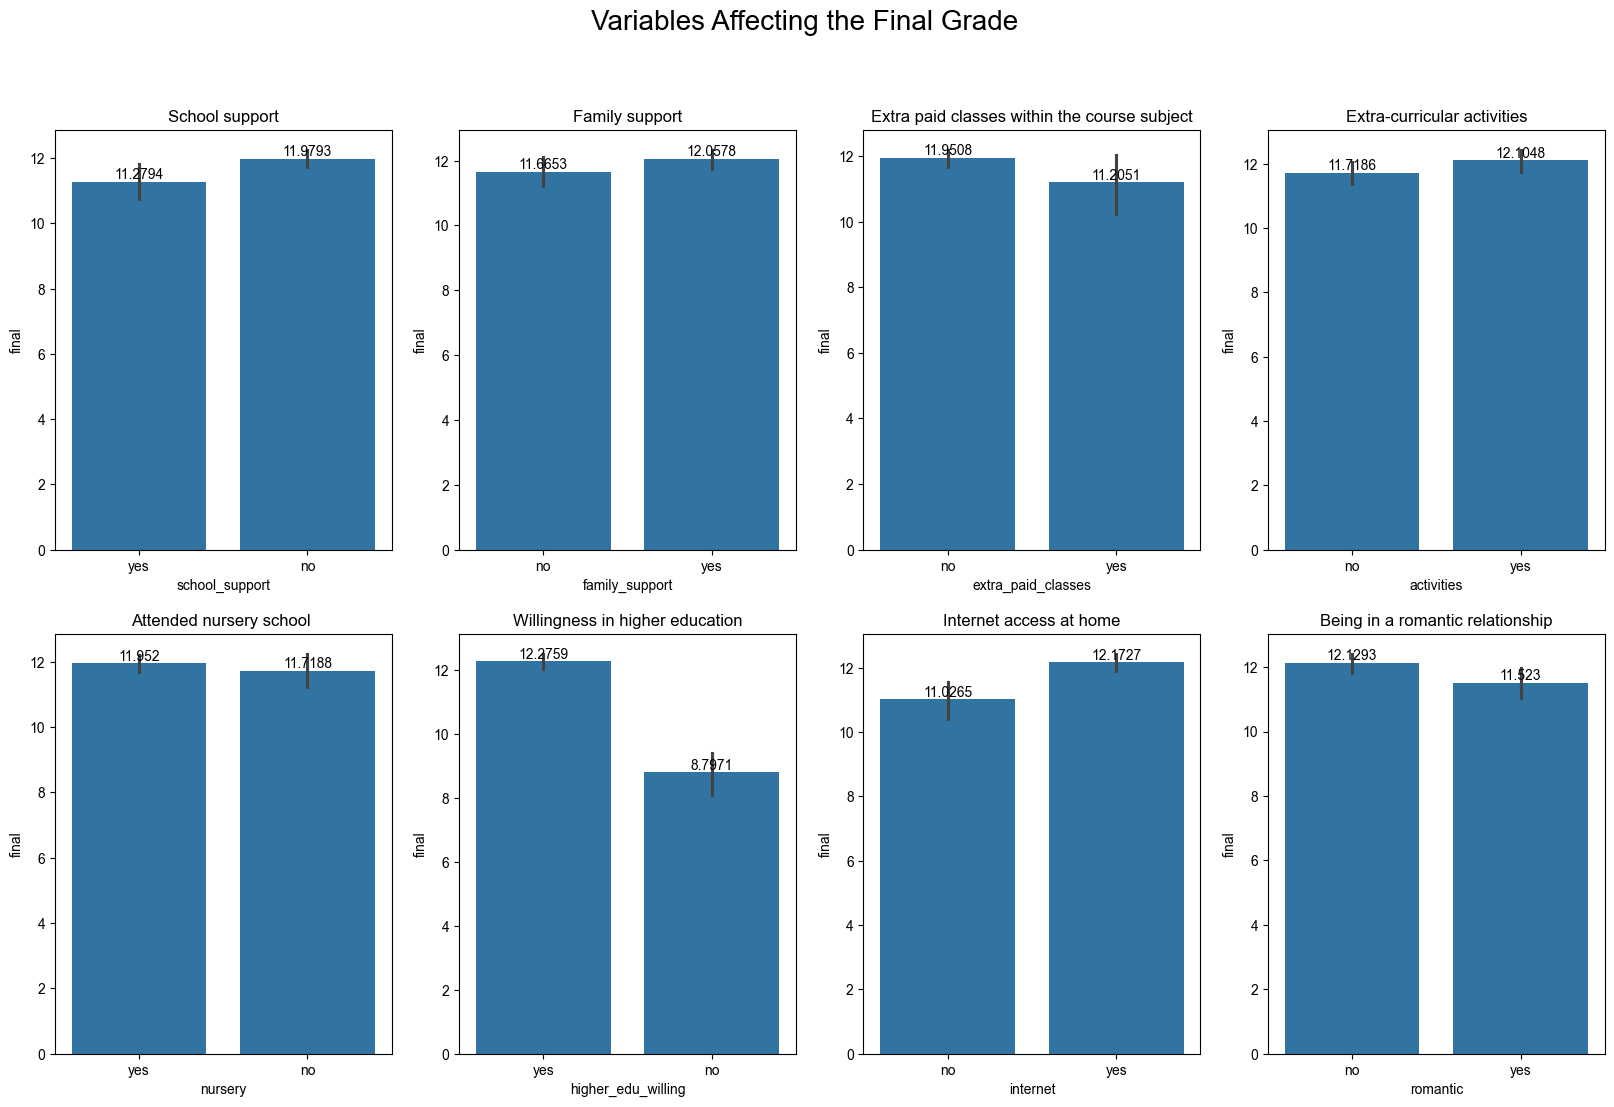

In [55]:
plt.figure(figsize=[20,12])

plt.suptitle('Variables Affecting the Final Grade', fontsize = 20)
plt.subplot(2,4,1)
ax = sns.barplot(x=df['school_support'], y=df['final'], data=df);
plt.title('School support');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,2)
ax= sns.barplot(x=df['family_support'], y=df['final'], data=df);
plt.title('Family support');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,3)
ax = sns.barplot(x=df['extra_paid_classes'], y=df['final'], data=df);
plt.title('Extra paid classes within the course subject');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,4)
ax = sns.barplot(x=df['activities'], y=df['final'], data=df);
plt.title('Extra-curricular activities');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,5)
ax = sns.barplot(x=df['nursery'], y=df['final'], data=df);
plt.title('Attended nursery school ');
ax.bar_label(ax.containers[0])


plt.subplot(2,4,6)
ax = sns.barplot(x=df['higher_edu_willing'], y=df['final'], data=df);
plt.title('Willingness in higher education');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,7)
ax = sns.barplot(x=df['internet'], y=df['final'], data=df);
plt.title('Internet access at home');
ax.bar_label(ax.containers[0])

plt.subplot(2,4,8)
ax = sns.barplot(x=df['romantic'], y=df['final'], data=df);
plt.title('Being in a romantic relationship');
ax.bar_label(ax.containers[0])

sns.set_theme(rc={'figure.figsize':(10,7)})

plt.savefig("Finalnotunaetkiler.png")

In [56]:
df = df.replace({'yes': 1, 'no': 0})
df

,age,Medu,Fedu,traveltime,studytime,failures,school_support,family_support,extra_paid_classes,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,1,1,1,2,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,16,3,3,1,2,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
645,18,3,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
646,18,1,1,2,2,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
647,17,3,1,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   649 non-null    int64
 1   Medu                  649 non-null    int64
 2   Fedu                  649 non-null    int64
 3   traveltime            649 non-null    int64
 4   studytime             649 non-null    int64
 5   failures              649 non-null    int64
 6   school_support        649 non-null    int64
 7   family_support        649 non-null    int64
 8   extra_paid_classes    649 non-null    int64
 9   activities            649 non-null    int64
 10  nursery               649 non-null    int64
 11  higher_edu_willing    649 non-null    int64
 12  internet              649 non-null    int64
 13  romantic              649 non-null    int64
 14  family_relationships  649 non-null    int64
 15  freetime              649 non-null    int64
 16  goout   

In [58]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,school_support,family_support,extra_paid_classes,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.005458,-0.054279,...,-0.046692,-0.103504,0.058406,-0.024570,-0.054154,-0.014716,-0.006385,-0.016565,-0.048726,0.330353
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,-0.022168,0.120491,0.113973,0.119354,...,0.449847,0.155576,-0.117551,-0.012576,0.258136,0.036580,-0.034855,0.132502,0.091562,-0.101123
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.023572,0.135191,0.094628,0.079700,...,0.312130,0.227081,-0.216447,0.026575,0.348874,0.017710,-0.027127,0.085076,-0.044450,-0.066684
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.044807,-0.039289,-0.044842,-0.033376,...,-0.097961,-0.089981,0.101121,-0.031740,-0.040209,-0.125946,0.059440,-0.076058,-0.066130,0.090497
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,0.089316,0.143509,-0.002314,0.070080,...,0.035469,0.096471,-0.035826,0.014716,-0.020335,-0.011796,-0.088833,0.179023,-0.018076,0.006440
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.000745,-0.006982,0.069416,0.000561,...,-0.123945,-0.057688,0.044940,-0.006725,-0.079352,-0.080719,0.000204,-0.111185,-0.056527,0.234027
school_support,-0.167841,-0.022168,0.023572,-0.044807,0.089316,-0.000745,1.000000,0.075402,0.040512,-0.030246,...,-0.056772,0.070481,-0.014747,-0.055696,0.070951,0.052495,0.007306,0.024482,-0.018390,-0.026798
family_support,-0.101894,0.120491,0.135191,-0.039289,0.143509,-0.006982,0.075402,1.000000,0.094297,-0.007433,...,0.028670,0.083770,-0.064231,-0.007044,0.026580,0.027275,-0.092220,0.048130,-0.034759,0.050158
extra_paid_classes,-0.005458,0.113973,0.094628,-0.044842,-0.002314,0.069416,0.040512,0.094297,1.000000,0.065781,...,-0.006743,-0.013400,0.012374,0.001782,-0.032951,0.062376,0.034544,-0.087492,0.037643,0.040941
activities,-0.054279,0.119354,0.079700,-0.033376,0.070080,0.000561,-0.030246,-0.007433,0.065781,1.000000,...,0.098696,-0.002723,-0.062991,0.035401,0.034036,-0.082974,-0.087820,0.145740,0.041487,-0.024076


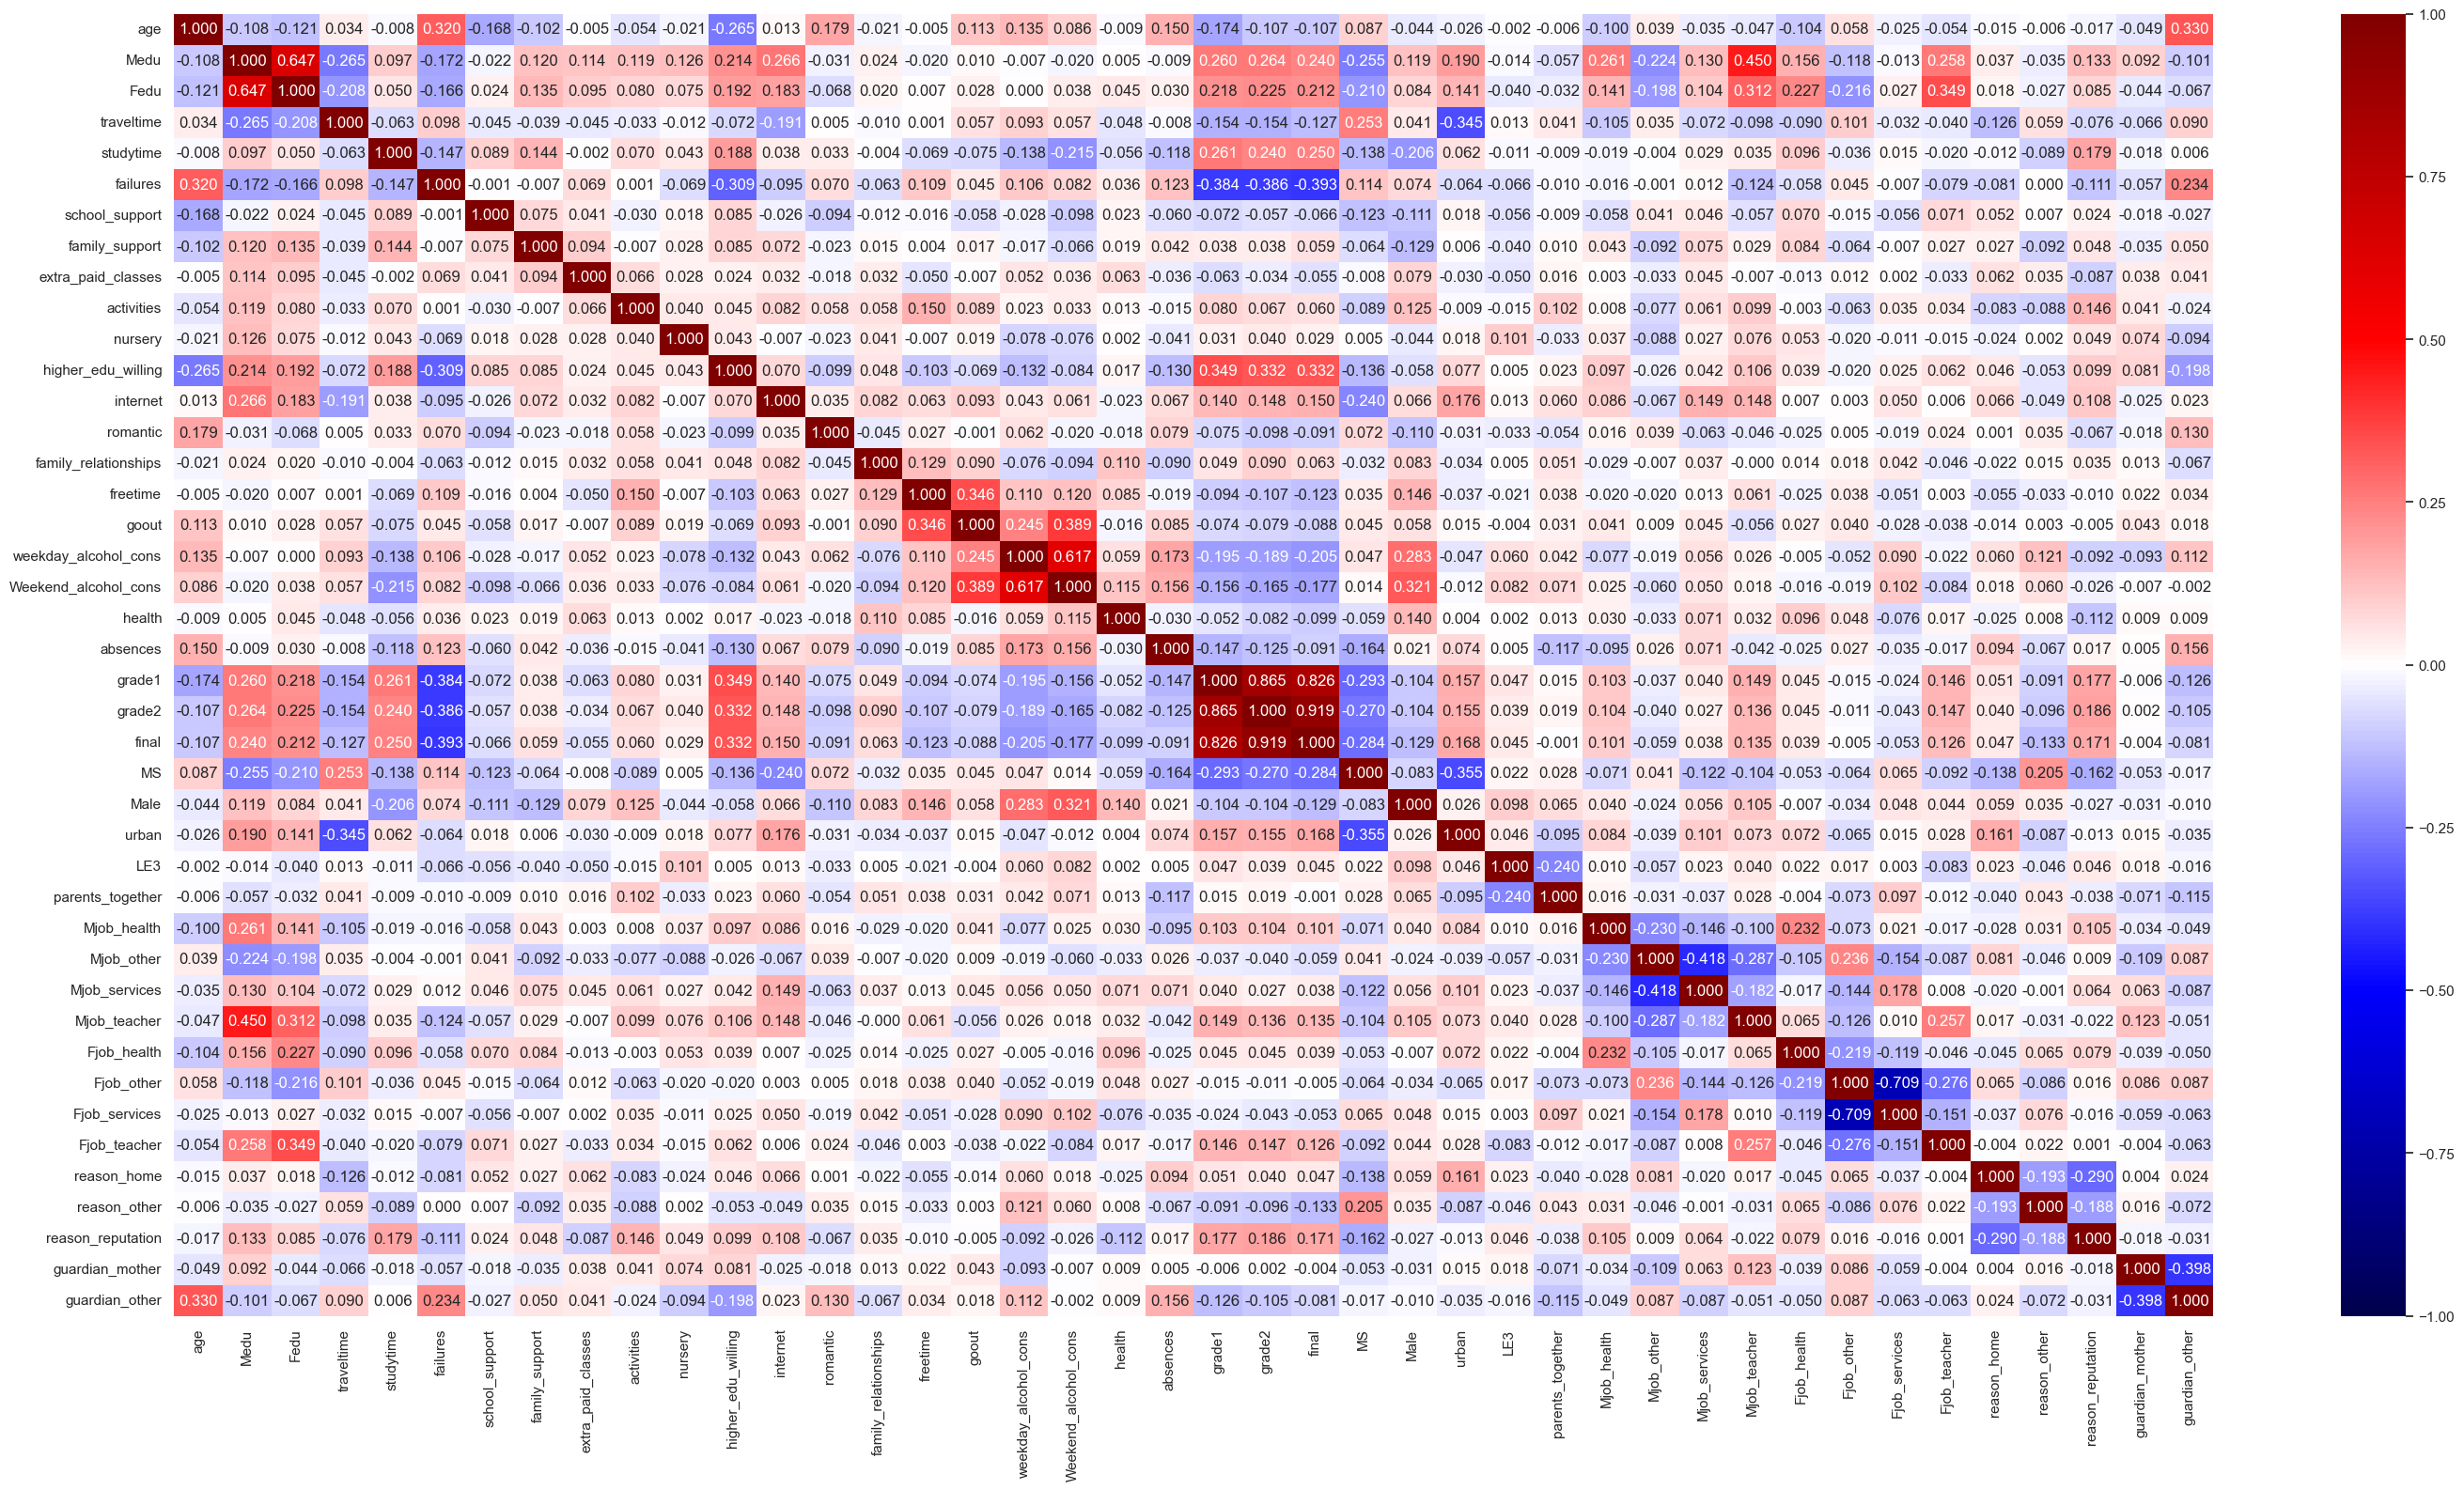

In [59]:
plt.figure(figsize=[35,18])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.3f');
plt.savefig("finalheatmap.png")

In [60]:
coef = df.corr()['final'].sort_values(ascending=False)
coef

final                   1.000000
grade2                  0.918548
grade1                  0.826387
higher_edu_willing      0.332172
studytime               0.249789
Medu                    0.240151
Fedu                    0.211800
reason_reputation       0.170944
urban                   0.167637
internet                0.150025
Mjob_teacher            0.134910
Fjob_teacher            0.125916
Mjob_health             0.101244
family_relationships    0.063361
activities              0.059791
family_support          0.059206
reason_home             0.046537
LE3                     0.045016
Fjob_health             0.039142
Mjob_services           0.038447
nursery                 0.028752
parents_together       -0.000754
guardian_mother        -0.004415
Fjob_other             -0.005301
Fjob_services          -0.053204
extra_paid_classes     -0.054898
Mjob_other             -0.059251
school_support         -0.066405
guardian_other         -0.080729
goout                  -0.087641
romantic  

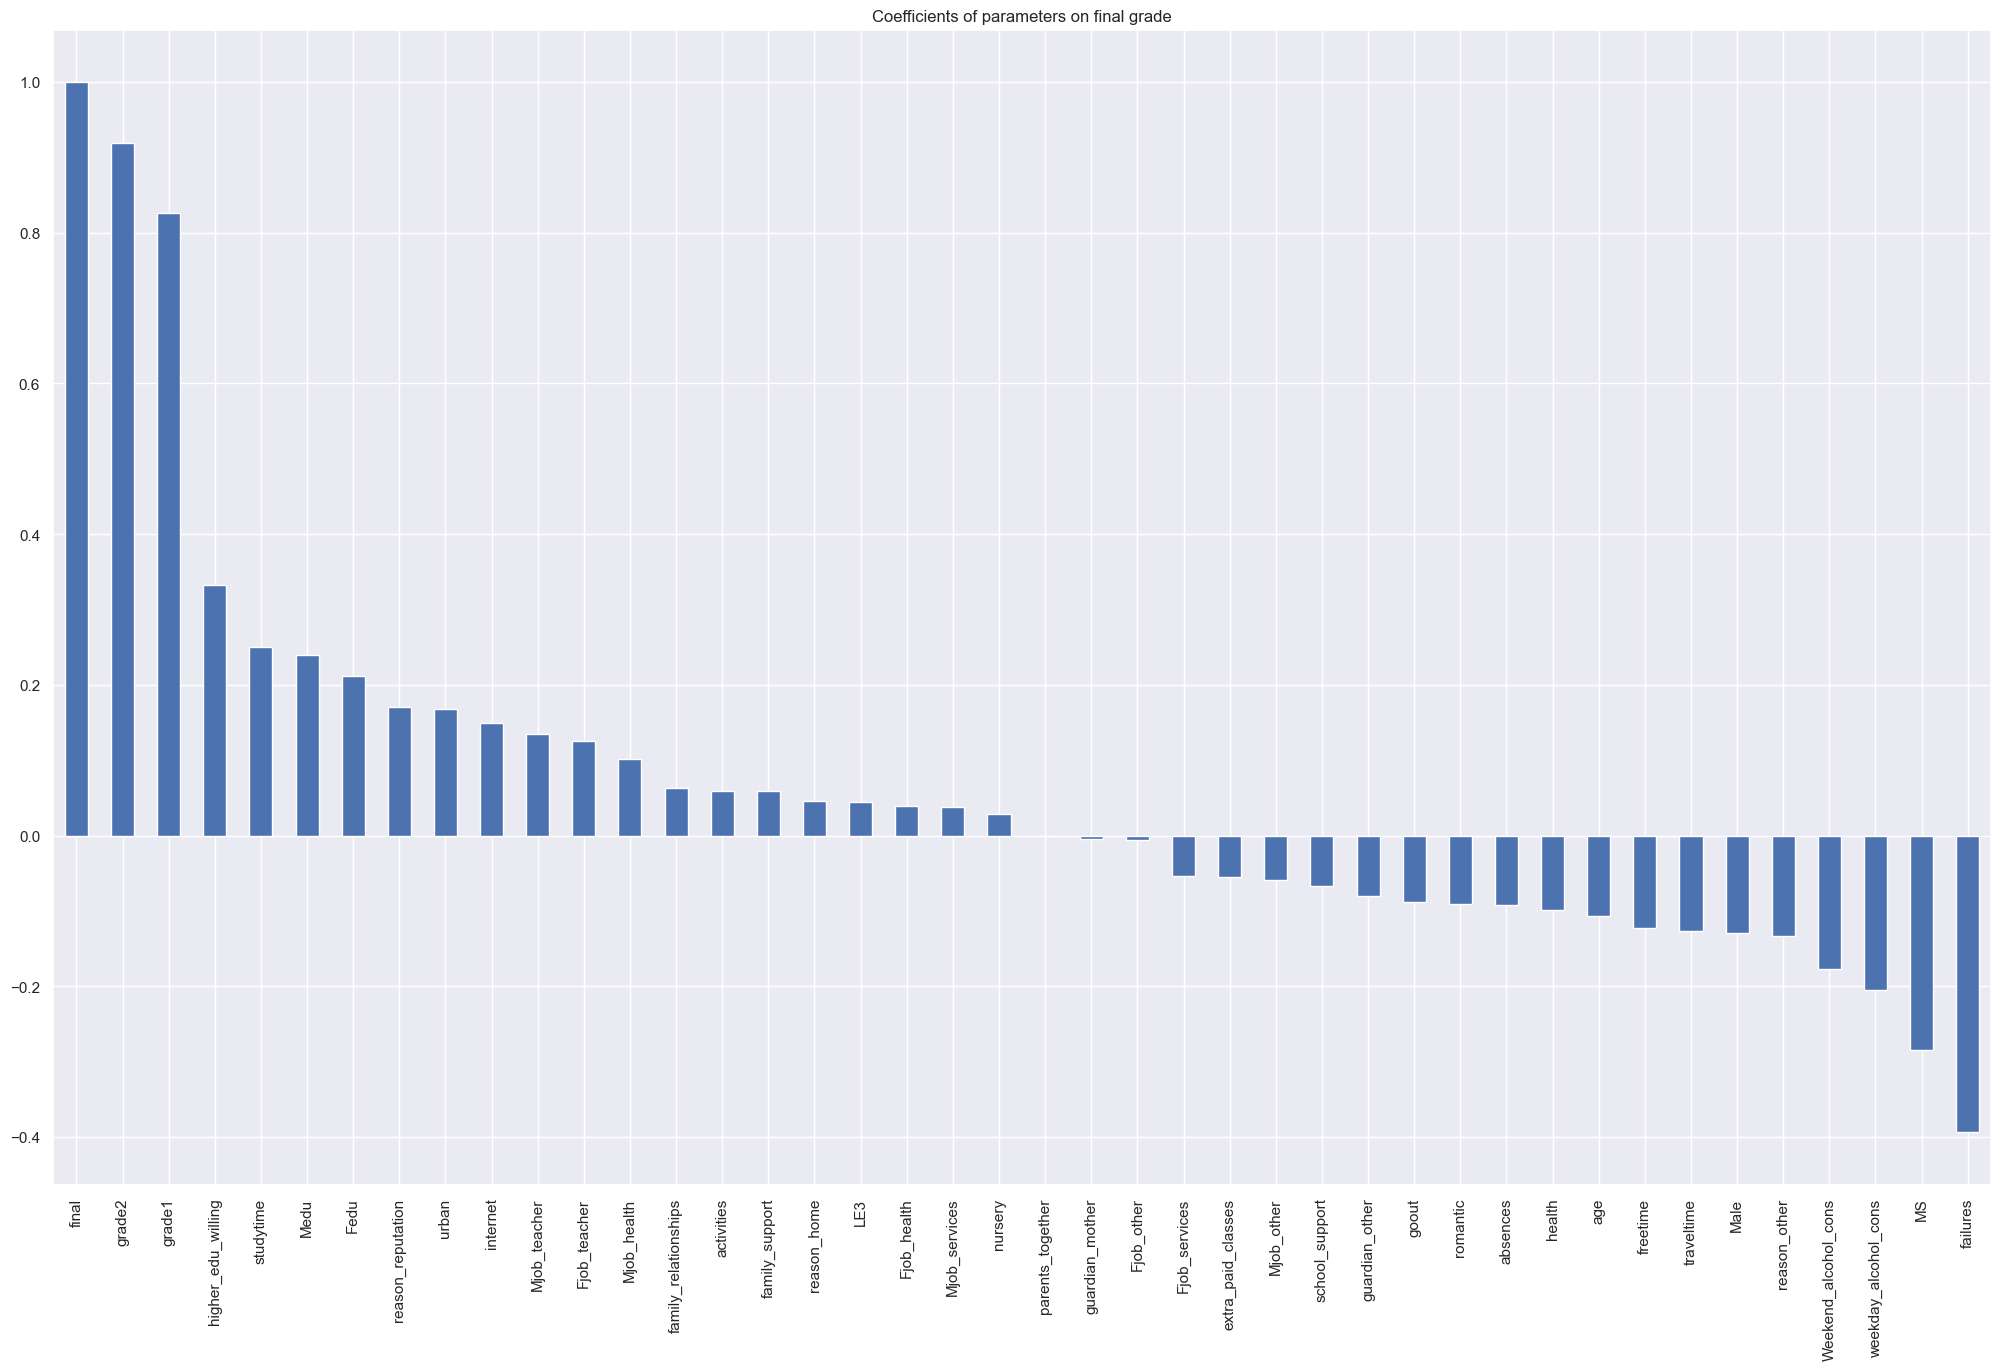

In [186]:
parameters = df.columns
coef = Series(coef, parameters).sort_values(ascending=False)
plt.figure(figsize=[25,15])
coef.plot(kind='bar', title='Coefficients of parameters on final grade');
plt.savefig("coef.png")

In [62]:
# Modeli Eğitme ve Model Sonucunu Görüntüleme
lsm = smf.ols( 'final ~ grade2 + grade1 + higher_edu_willing + studytime + Medu + Fedu + failures + MS + weekday_alcohol_cons', data=df)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  final   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     406.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.01e-257
Time:                        09:53:46   Log-Likelihood:                -1063.0
No. Observations:                 649   AIC:                             2146.
Df Residuals:                     639   BIC:                             2191.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3934      0.326      1.205      0.229      -0.247       1.034
grade2                   0.8838      0.034     25.926      0.000       0.817       0.951
grade1                   0.1222      0.037      3.335      0.001       0.050       0.194
higher_edu_willing       0.1308      0.177      0.740      0.460      -0.216       0.478
studytime                0.0668      0.062      1.071      0.284      -0.056       0.189
Medu                    -0.0606      0.058     -1.037      0.300      -0.175       0.054
Fedu                     0.0216      0.059      0.365      0.716      -0.095       0.138
failures                -0.1939      0.093     -2.092      0.037      -0.376      -0.012
MS                      -0.2270      0.111     -2.053      0.040      -0.444      -0.010
weekday_alcohol_cons    -0.0846      0.055     -1.543      0.123      -0.192       0.023
==============================================================================
Omnibus:                      464.742   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10611.983
Skew:                          -2.888   Prob(JB):                         0.00
Kurtosis:                      21.949   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# P>|t| değeri 0.25'ten büyük olanları modelimden kaldırdım
lsm2 = smf.ols( 'final ~ grade2 + grade1 + failures + MS + weekday_alcohol_cons', data=df)
fit2 = lsm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  final   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     732.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.09e-262
Time:                        09:53:46   Log-Likelihood:                -1064.4
No. Observations:                 649   AIC:                             2141.
Df Residuals:                     643   BIC:                             2168.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5011      0.288      1.740      0.082      -0.064       1.067
grade2                   0.8834      0.034     26.022      0.000       0.817       0.950
grade1                   0.1271      0.036      3.501      0.000       0.056       0.198
failures                -0.2066      0.091     -2.282      0.023      -0.384      -0.029
MS                      -0.2180      0.108     -2.017      0.044      -0.430      -0.006
weekday_alcohol_cons    -0.0948      0.054     -1.745      0.081      -0.202       0.012
==============================================================================
Omnibus:                      466.708   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10762.783
Skew:                          -2.903   Prob(JB):                         0.00
Kurtosis:                      22.087   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lsm3 = smf.ols( 'final ~ grade2 + grade1 + failures ', data=df)
fit3 = lsm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  final   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1209.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.96e-264
Time:                        09:53:46   Log-Likelihood:                -1068.0
No. Observations:                 649   AIC:                             2144.
Df Residuals:                     645   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0851      0.241      0.353      0.724      -0.388       0.559
grade2         0.8880      0.034     26.093      0.000       0.821       0.955
grade1         0.1398      0.036      3.872      0.000       0.069       0.211
failures      -0.2109      0.091     -2.321      0.021      -0.389      -0.032
==============================================================================
Omnibus:                      472.306   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10854.592
Skew:                          -2.957   Prob(JB):                         0.00
Kurtosis:                      22.142   Cond. No.                         83.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#ikinci model ile devam ediyorum aykırı değer atıp model scoreunda iyileştirme sağlayabilirim

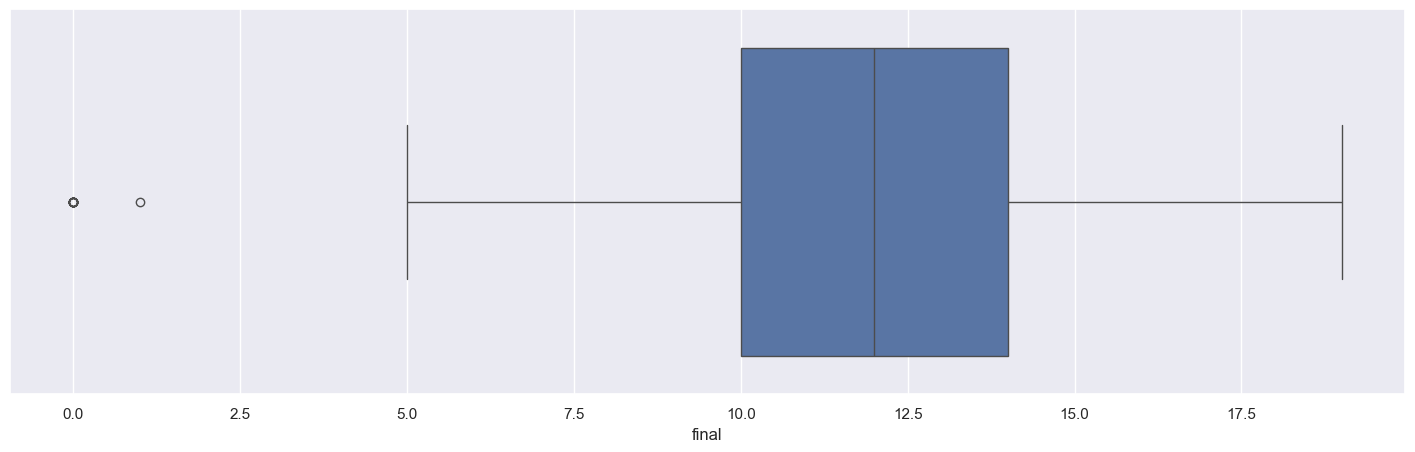

In [66]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['final'], data=df);

In [67]:
def extract_whiskers(data, whisker=1.5):
    median_value = np.median(data) # Medyan
    upper_quartile = np.percentile(data, 75) # 75%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile # Interquartile Range
    
    upper_whisker = data[data<=upper_quartile+whisker*iqr].max() # Maksimum Kabul Edilen Değer
    lower_whisker = data[data>=lower_quartile-whisker*iqr].min() # Minimum Kabul Edilen Değer
    
    print("Upper Whisker:", upper_whisker)
    print("Lower Whisker:", lower_whisker)

In [68]:
extract_whiskers(df['final'])

Upper Whisker: 19
Lower Whisker: 5


In [69]:
df[df['final'] >= 19]

,age,Medu,Fedu,traveltime,studytime,failures,school_support,family_support,extra_paid_classes,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
338,17,3,1,2,4,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
636,18,4,4,1,2,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0


In [70]:
df[df['final'] < 5]

,age,Medu,Fedu,traveltime,studytime,failures,school_support,family_support,extra_paid_classes,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
163,18,1,1,1,1,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
172,16,3,3,1,2,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
440,16,1,1,2,2,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
519,16,2,1,2,2,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
563,17,2,2,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
567,18,3,2,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
583,18,2,2,2,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
586,17,4,2,1,2,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0
597,18,2,2,3,2,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
603,18,4,2,1,2,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0


In [71]:
df = df.loc[df['final'] <= 19]
df = df.loc[df['final'] > 5]

In [72]:
from sklearn.preprocessing import StandardScaler

X = df.loc[:,['grade2','grade1','failures','MS','weekday_alcohol_cons']]
y = df['final']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [73]:
X_train.shape

(505, 5)

In [74]:
x_test.shape

(127, 5)

In [75]:
x_train.shape

(378, 5)

In [76]:
x_val.shape

(127, 5)

In [77]:
# Validasyonla model seçmek için kullanacağımız 3 model

# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=10)

# Lasso
lassoReg = Lasso(alpha=1)

lassoReg.fit(x_train_scaled,y_train)

pred = lassoReg.predict(x_val_scaled)

mse = np.mean((pred - y_val)**2)

print("Validation Score: ", lassoReg.score(x_val_scaled, y_val))
print("MSE: ", mse)

Validation Score:  0.7614287577145586
MSE:  1.4541175328040903


In [78]:
# Validation veri setindeki sonuçlar

lm.fit(x_train_scaled, y_train)
print(f'Linear Regression R2: {lm.score(x_val_scaled, y_val):.7f}')
lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.7f}')
lassoReg.fit(x_train_scaled,y_train)
print(f'Lasso Regression R2: {lassoReg.score(x_val_scaled, y_val):.7f}')

Linear Regression R2: 0.9117797
Ridge Regression R2: 0.9108655
Lasso Regression R2: 0.7614288


In [79]:
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression','Lasso Regression'],
    'R2 Score': [lm.score(x_val_scaled, y_val), lm_reg.score(x_val_scaled, y_val),lassoReg.score(x_val_scaled, y_val)]})
model_result_df = model_results.sort_values(by='R2 Score', ascending=False)
model_result_df = model_results.set_index('Model')
model_result_df

,R2 Score
Model,
Linear Regression,0.911780
Ridge Regression,0.910866
Lasso Regression,0.761429


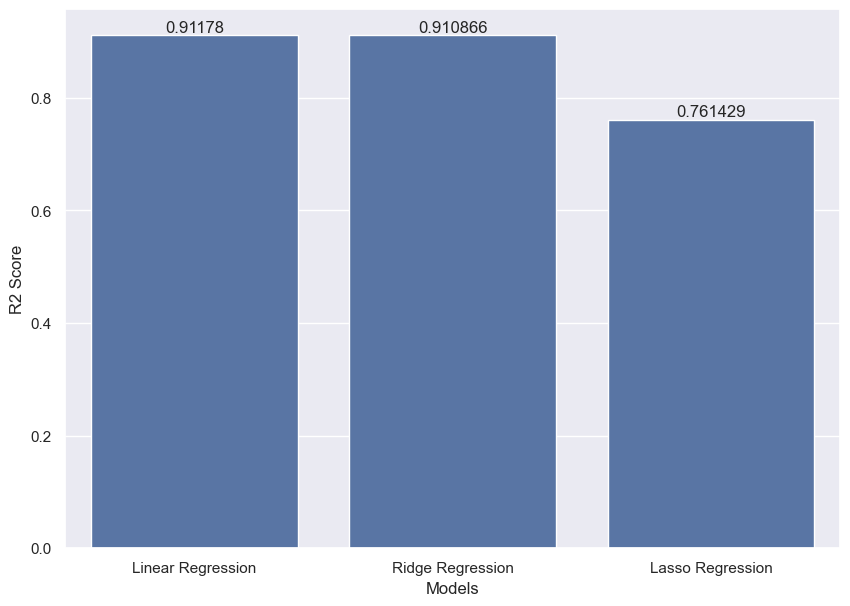

In [80]:
sns.set_theme(rc={'figure.figsize':(10,7)})
ax = sns.barplot(x=model_result_df.index, y=model_result_df['R2 Score'], data=model_result_df);
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.savefig("R2score_model.png")

In [81]:
#Ridge ve Linear aynı başarıda  Ridge parametresiyle iyileştirme yapılabilir mi bakıyorum

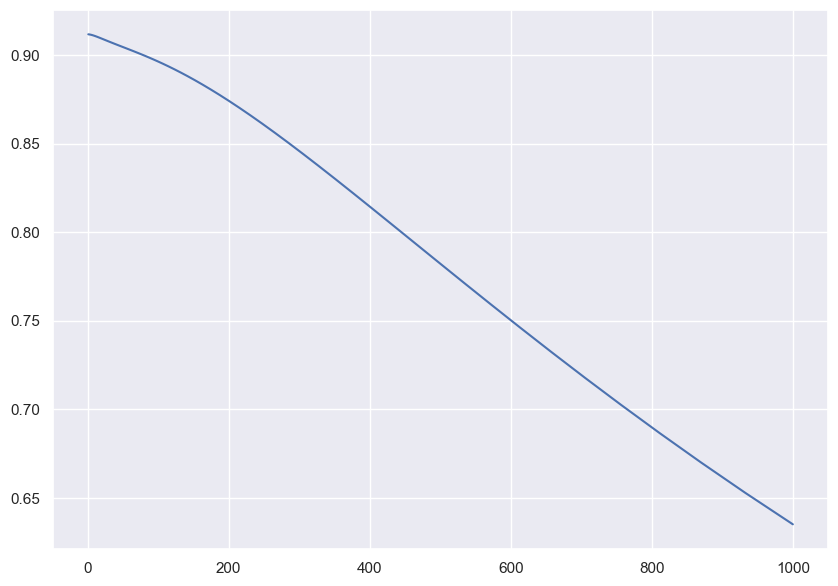

In [82]:
from sklearn.metrics import r2_score

alphalist = 10**(np.linspace(0,3,100))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    ridge = Ridge(alpha = curr_alpha)
    ridge.fit(x_train_scaled, y_train)

    val_set_pred = ridge.predict(x_val_scaled)
    err_vec_val[index] = r2_score(y_val, val_set_pred)
plt.plot(alphalist, err_vec_val);

In [83]:
np.max(err_vec_val)

0.9117552653195107

In [84]:
alphalist[np.argmax(err_vec_val)]

1.0

In [85]:
lm_reg = Ridge(alpha=1)

In [86]:
lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.7f}')
lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.7f}')

Linear Regression R2: 0.9117797
Ridge Regression R2: 0.9117553


In [87]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv = cross_val_score(lr, X_train, Y_train, cv=20, scoring='r2')
lr_cv

array([0.95902667, 0.9231797 , 0.91327942, 0.8522967 , 0.86629422,
       0.94586239, 0.88802065, 0.95494586, 0.86610913, 0.96254017,
       0.86787098, 0.93107671, 0.91990732, 0.74028039, 0.52836793,
       0.89669175, 0.72072043, 0.74994038, 0.968384  , 0.85762304])

In [88]:
ridge = Ridge()
X_train_scaled = scaler.fit_transform(X_train.values)

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=20, scoring='r2')
ridge_cv

array([0.95919112, 0.92265602, 0.91295567, 0.85233861, 0.86619998,
       0.94575023, 0.88896627, 0.95476202, 0.8659612 , 0.96228605,
       0.86790968, 0.93103033, 0.92043681, 0.73977467, 0.52841172,
       0.89650001, 0.72043807, 0.7506887 , 0.96852121, 0.85709087])

In [89]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'Cross Validated Score (Mean)': [lr_cv.mean(), ridge_cv.mean()],
    'Cross Validated Score (Std)': [lr_cv.std(), ridge_cv.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Linear Regression,0.865621,0.105227
Ridge Regression,0.865593,0.105219


In [90]:
# Modelimizin başarısı
X_scaled = scaler.fit_transform(X_train.values)
lm.fit(X_scaled, Y_train)
print(f'Linear Regression Test R2 Score: {lm.score(x_test_scaled, y_test):.3f}')

Linear Regression Test R2 Score: 0.910


In [91]:
model_basarisi = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Linear Regression Test R2 Score': [lm.score(x_test_scaled, y_test)]})
model_basarisi = model_basarisi.set_index('Model')
model_basarisi

,Linear Regression Test R2 Score
Model,
Linear Regression,0.910315


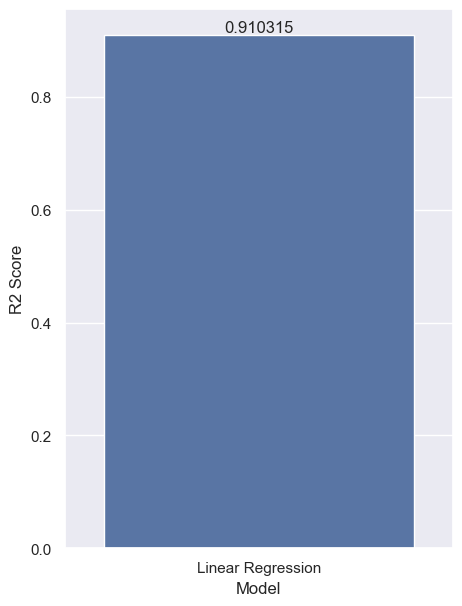

In [92]:
sns.set_theme(rc={'figure.figsize':(5,7)})
ax = sns.barplot(x=model_basarisi.index, y=model_basarisi['Linear Regression Test R2 Score'], data=model_basarisi);
ax.bar_label(ax.containers[0])
plt.ylabel('R2 Score')
plt.savefig("Modelbasarisi.png")